In [16]:
#Importing most of the libraries we have used in our assignments that we will use in this project
from sklearn.model_selection import train_test_split

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("./data.csv")
df[0::10]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
10,0,0.482475,0.567543,0.538198,0.614026,0.614026,0.998978,0.797535,0.809460,0.303759,...,0.814111,0.076972,0.623687,0.614021,0.841337,0.278356,0.026971,0.565892,1,0.036572
20,0,0.485253,0.545573,0.534665,0.622177,0.622256,0.999065,0.797522,0.809406,0.303554,...,0.804639,0.014039,0.623922,0.622177,0.840639,0.277988,0.026794,0.565171,1,0.039507
30,1,0.462195,0.536034,0.514428,0.599987,0.599987,0.998909,0.797291,0.809223,0.303477,...,0.787082,0.001631,0.621876,0.599984,0.838259,0.297038,0.024886,0.576473,1,0.014562
40,0,0.507824,0.571631,0.549226,0.625326,0.625326,0.999136,0.797542,0.809413,0.303442,...,0.815731,0.007173,0.623729,0.625327,0.841574,0.279236,0.026908,0.565659,1,0.031485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6770,0,0.435967,0.498692,0.486054,0.603626,0.603626,0.998893,0.797239,0.809179,0.303421,...,0.773759,0.001563,0.623994,0.603624,0.838736,0.276539,0.026787,0.565138,1,0.062338
6780,0,0.520402,0.586295,0.567910,0.610545,0.610343,0.999095,0.797565,0.809454,0.303567,...,0.827839,0.003365,0.624445,0.610541,0.841969,0.276784,0.026791,0.565160,1,0.056275
6790,0,0.474333,0.530637,0.524653,0.599281,0.599353,0.998958,0.797356,0.809287,0.303489,...,0.791776,0.000581,0.622525,0.599277,0.839482,0.287351,0.025696,0.707735,1,0.017872
6800,0,0.438210,0.493295,0.484769,0.619762,0.619784,0.998926,0.797223,0.809153,0.303323,...,0.772423,0.000526,0.623801,0.619757,0.838684,0.276378,0.026774,0.565077,1,0.067287


# Check if our data has duplicate data

In [17]:
df.duplicated(keep=False).sum()

0

# Check if our data has any null values

In [18]:
df.isnull().values.sum()

0

# The data consist of only int64 and float64 data types

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [20]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [21]:
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

(4773, 95)
(2046, 95)
(4773,)
(2046,)


# The data is imbalanced and needs to balanced

0    6599
1     220
Name: Bankrupt?, dtype: int64


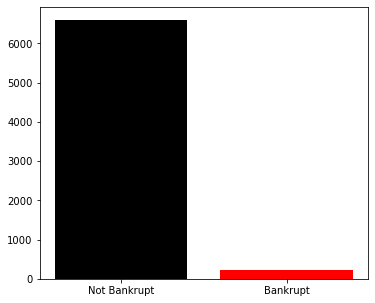

In [22]:
#we have inbalanced data
print(df['Bankrupt?'].value_counts())

no = df['Bankrupt?'].value_counts()[0]
yes = df['Bankrupt?'].value_counts()[1]


names = ['Not Bankrupt','Bankrupt']
values = [no,yes]
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.bar(names, values, color=['black','red'])
plt.show()

# We use a SMOTE(Synthetic Minority Oversampling Technique) to correct the imbalance of our data

In [25]:
#pip install -U imbalanced-learn

# transform the dataset using smote oversampling
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

1    6599
0    6599
Name: Bankrupt?, dtype: int64


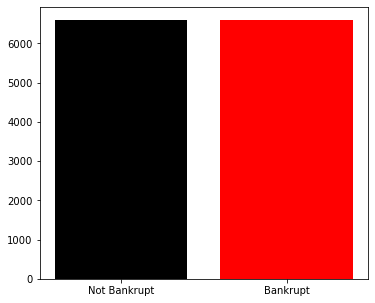

In [26]:
print(y.value_counts())

no = y.value_counts()[0]
yes = y.value_counts()[1]


names = ['Not Bankrupt','Bankrupt']
values = [no,yes]
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.bar(names, values, color=['black','red'])
plt.show()

# Split our data into training and testing variables

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9238, 95)
(3960, 95)
(9238,)
(3960,)
